<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/SineGaussianSignalDataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

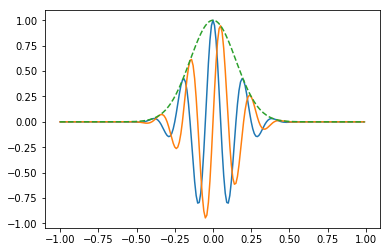

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)
plt.plot(t, i, t, q, t, e, '--')

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


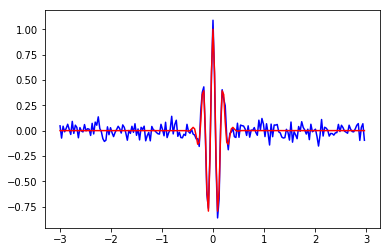

In [86]:
t = np.linspace(-3, 3, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5 , retquad=True, retenv=True)
n = 1/20*np.random.randn(len(t))
xn = i + n
plt.plot(t, xn, 'b', t, i, 'r')

In [0]:
import os
base_dir = "drive/My Drive/Colab Notebooks/SignalProc/Iteration 2"
seta = 'actual'
setb = 'noise'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

def prepare_data(base_dir, seta, setb):
    seta_train_dir = os.path.join(train_dir, seta)
    setb_train_dir = os.path.join(train_dir, setb)
    
    seta_valid_dir = os.path.join(validation_dir, seta)
    setb_valid_dir = os.path.join(validation_dir, setb)
    
    seta_train_fnnames = os.listdir(seta_train_dir)
    setb_train_fnnames = os.listdir(setb_train_dir)
    
    return seta_train_dir, setb_train_dir, seta_valid_dir, setb_valid_dir, seta_train_fnnames, setb_train_fnnames

seta_train_dir, setb_train_dir, seta_valid_dir, setb_valid_dir, seta_train_fnnames, setb_train_fnnames = prepare_data(base_dir, seta, setb)

seta_test_dir = os.path.join(test_dir, seta)
setb_test_dir = os.path.join(test_dir, setb)
test_fnnames_seta = os.listdir(seta_test_dir)
test_fnnames_setb = os.listdir(setb_test_dir)

In [140]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
fs = 100

alpha = np.linspace(1, 5, num = 200)
neu = np.linspace(5, 20, num = 200)

t = np.linspace(-3, 3, 2 * 100, endpoint=False)

def plot_spectrogram_sig(sig, fs):
  from scipy import signal
  freqs, times, spectrogram = signal.spectrogram(sig)
  plt.imshow(spectrogram, aspect='auto')
  plt.ylabel('Frequency band')
  plt.xlabel('Time window')
  plt.title('Spectrogram for Signal : Iteration %d' %a)
  plt.savefig(os.path.join(seta_train_dir,'SPG for Signal%d'%a))
  plt.close()
  
  
def plot_spectrogram_ns(noise, fs):
  from scipy import signal
  freqs, times, spectrogram = signal.spectrogram(noise)
  plt.imshow(spectrogram, aspect='auto')
  plt.ylabel('Frequency band')
  plt.xlabel('Time window')
  plt.title('Spectrogram for Noise : Iteration %d' %a)
  plt.savefig(os.path.join(setb_train_dir,'SPG for Noise%d'%a))
  plt.close()

for a in range(0, 200, 1):
  i, q, e = signal.gausspulse(t, fc=1*alpha[a], retquad=True, retenv=True)
  n = (1/neu[a])*alpha[a]*np.random.randn(len(t)) 
  xn = i + n # Noise+Signal
  plot_spectrogram_sig(xn, fs)

for a in range(0, 200, 1):
  n = (1/neu[a])*alpha[a]*np.random.randn(len(t)) 
  plot_spectrogram_ns(n, fs)

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 200, using nperseg = 200
  .format(nperseg, input_length))
